<center><img  src="Georgian College Logo.svg"></center

<h1><font color='#004b87'><center>BDAT1004-24F-10909</center></font></h1>
<h3><center>Problem set 3</center></h3>
<h3><center>Abdirahman Ahmed Hadi Ali</center></h3>
<h3><center>ID 200579531</center></h3>


<h3><font color='#004b87'>Question 1</font></h3>
<p></p>
<li>Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men</li>

In [5]:
          #Import
import pandas as pd

        #Load dataset
url_users = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url_users, sep='|')

       #mean age per occupation
mean_age = users.groupby('occupation')['age'].mean()
print("Mean age per occupation:\n", mean_age)

         #ratio of males to total individuals for each occupation
male_ratio = (users[users['gender'] == 'M'].groupby('occupation')['gender'].count() /
              users.groupby('occupation')['gender'].count()).sort_values(ascending=False)
print("\nMale ratio per occupation:\n", male_ratio)

           #minimum and maximum age for each occupation
min_max_age = users.groupby('occupation')['age'].agg(['min', 'max'])
print("\nMin and Max age per occupation:\n", min_max_age)

           #mean age for combinations of occupation and gender
mean_age_gender = users.groupby(['occupation', 'gender'])['age'].mean()
print("\nMean age per occupation and gender:\n", mean_age_gender)

             #percentage of men and women in each occupation
gender_count = users.groupby(['occupation', 'gender']).size().unstack(fill_value=0)
percentage = (gender_count.div(gender_count.sum(axis=1), axis=0) * 100)
print("\nPercentage of men and women per occupation:\n", percentage)


Mean age per occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male ratio per occupation:
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0

<h3><font color='#004b87'>Question 2</font></h3>
<p></p>

<li>Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia</li>


In [6]:
             #Import
import pandas as pd

            #Load dataset
url_euro = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url_euro)

             #Select only the Goals
goals = euro12['Goals']
print("Goals column:\n", goals)

           #Count the number of teams that participated
num_teams = euro12['Team'].nunique()
print("\nNumber of teams in Euro 2012:", num_teams)

           #Count the number of columns
num_columns = euro12.shape[1]
print("\nNumber of columns in dataset:", num_columns)

           # Create a DataFrame with "Team", "Yellow Cards", and "Red Cards" columns
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("\nDiscipline DataFrame:\n", discipline)



Goals column:
 0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Number of teams in Euro 2012: 16

Number of columns in dataset: 35

Discipline DataFrame:
                    Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11

In [7]:
              #Sort the teams by Red Cards and then by Yellow Cards
sorted_teams = discipline.sort_values(by=['Red Cards', 'Yellow Cards'])
print("\nTeams sorted by Red Cards, then Yellow Cards:\n", sorted_teams)

              #mean number o Yellow Cards per team
mean_yellow = discipline['Yellow Cards'].mean()
print("\nMean Yellow Cards per team:", mean_yellow)

             #Filter teams that scored more than 6
teams_over_6_goals = euro12[euro12['Goals'] > 6]['Team']
print("\nTeams scoring more than 6 goals:\n", teams_over_6_goals)

              #Select teams that start with g
teams_starting_with_g = euro12[euro12['Team'].str.startswith('G')]['Team']
print("\nTeams starting with 'G':\n", teams_starting_with_g)

               #Select the first 7 columns
first_7_columns = euro12.iloc[:, :7]
print("\nFirst 7 columns:\n", first_7_columns)

               #Select all columns except the last 3
all_except_last_3 = euro12.iloc[:, :-3]
print("\nAll columns except the last 3:\n", all_except_last_3)

               #Shooting Accuracy for England, Italy, and Russia
shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print("\nShooting Accuracy for England, Italy, and Russia:\n", shooting_accuracy)
# Sort the teams by "Red Cards" and then by "Yellow Cards"
sorted_teams = discipline.sort_values(by=['Red Cards', 'Yellow Cards'])
print("\nTeams sorted by Red Cards, then Yellow Cards:\n", sorted_teams)

           


Teams sorted by Red Cards, then Yellow Cards:
                    Team  Yellow Cards  Red Cards
2               Denmark             4          0
5               Germany             4          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
4                France             6          0
12               Russia             6          0
1        Czech Republic             7          0
14               Sweden             7          0
0               Croatia             9          0
13                Spain            11          0
10             Portugal            12          0
7                 Italy            16          0
11  Republic of Ireland             6          1
9                Poland             7          1
6                Greece             9          1

Mean Yellow Cards per team: 7.4375

Teams scoring more than 6 goals:
 5     Germany
13      Spain
Name: Team, dtype: o

<h3><font color='#004b87'>Question 3</font></h3>
<p></p>

<li>Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299
</li>


In [8]:
                #Import libraries
import pandas as pd
import numpy as np

              # Generate random data for three Series
bedrs = np.random.randint(1, 5, 100)           # Random integers between 1 and 4
bathrs = np.random.randint(1, 4, 100)          # Random integers between 1 and 3
price_sqr_meter = np.random.randint(10000, 30000, 100)  # Random integers between 10,000 and 30,000

                #Combine the Series
housing_data = pd.DataFrame({
    'bedrs': bedrs,
    'bathrs': bathrs,
    'price_sqr_meter': price_sqr_meter
})
print("Housing DataFrame:\n", housing_data.head())

          # Combine all three Series into a single column
bigcolumn = pd.DataFrame({'bigcolumn': np.concatenate([bedrs, bathrs, price_sqr_meter])})
print("\nBigColumn DataFrame (first 10 rows):\n", bigcolumn.head(10))

             # Reindex the combined DataFrame to span indices from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)
print("\nBigColumn DataFrame with reindexed rows:\n", bigcolumn.head(10))


Housing DataFrame:
    bedrs  bathrs  price_sqr_meter
0      1       1            17190
1      3       3            11671
2      4       2            14080
3      2       2            15760
4      4       3            20366

BigColumn DataFrame (first 10 rows):
    bigcolumn
0          1
1          3
2          4
3          2
4          4
5          4
6          2
7          3
8          4
9          3

BigColumn DataFrame with reindexed rows:
    bigcolumn
0          1
1          3
2          4
3          2
4          4
5          4
6          2
7          3
8          4
9          3


<h3><font color='#004b87'>Question 4</font></h3>
<p></p>

<li>Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.</li>
<p></p>


In [9]:
                #Import libraries
import pandas as pd
import numpy as np

              #Load dataset
data_path = r"C:\Users\Dell_User\OneDrive - Georgian College\Desktop\wind.txt"
data = pd.read_csv(data_path, delim_whitespace=True, header=None)

                #Assign column names
data.columns = ['Year', 'Month', 'Day', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA',
                'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']

              #replace the first three columns with a proper date/time index
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1), errors='coerce')
data.set_index('Date', inplace=True)
data.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

                #Fix incorrect years foormat
def fix_years(date):
    if date.year > 2000:  # Assume only '2061' is incorrect
        return date.replace(year=date.year - 100)
    return date

data.index = data.index.map(fix_years)
   
                  #make sure all columns are numeric
data = data.apply(pd.to_numeric, errors='coerce')

                   #missing values
missing_values = data.isnull().sum()
print("Missing values per location:\n", missing_values)

                    #total values
non_missing_total = data.notnull().sum().sum()
print("\nTotal non-missing values:", non_missing_total)

                  #overall mean windspeed
mean_windspeed = data.mean().mean()
print("\nOverall mean windspeed:", mean_windspeed)

              #min, max, mean, and std deviation for each location
loc_stats = data.agg(['min', 'max', 'mean', 'std']).transpose()
print("\nLocation statistics:\n", loc_stats)

                #Create day_stats with min, max, mean, and std deviation across locations per day
day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)
print("\nDaily statistics (first 5 days):\n", day_stats.head())

                 #average windspeed in January
january_data = data[data.index.month == 1]
avg_january_windspeed = january_data.mean()
print("\nAverage windspeed in January per location:\n", avg_january_windspeed)

               #yearly frequency
yearly_data = data.resample('Y').mean()
print("\nYearly mean windspeeds:\n", yearly_data)

               #monthly frequency
monthly_data = data.resample('M').mean()
print("\nMonthly mean windspeeds:\n", monthly_data)

              #weekly frequency
weekly_data = data.resample('W').mean()
print("\nWeekly mean windspeeds:\n", weekly_data.head())

                 #min, max, mean, and std deviation of windspeeds across all locations per week
weekly_stats = weekly_data.agg(['min', 'max', 'mean', 'std'], axis=1)
first_52_weeks_stats = weekly_stats.head(52)
print("\nWeekly statistics for first 52 weeks:\n", first_52_weeks_stats)


C:\Users\Dell_User\AppData\Local\Temp\ipykernel_12876\2105831940.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1), errors='coerce')


Missing values per location:
 RPT    7
VAL    4
ROS    3
KIL    6
SHA    3
BIR    1
DUB    4
CLA    3
MUL    4
CLO    2
BEL    1
MAL    5
dtype: int64

Total non-missing values: 78857

Overall mean windspeed: 10.227982360836938

Location statistics:
       min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794

Daily statistics (first 5 days):
              min    max       mean       std
Date                                        
NaT          NaN    NaN        NaN       NaN
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.18

<h3><font color='#004b87'>Question 5</font></h3>
<p></p>
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

  

In [10]:
              #Import library
url_chipo = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url_chipo, sep='\t')

                 #Display the first 10 entries
first_10_entries = chipo.head(10)
print("First 10 entries:\n", first_10_entries)

            #number of observations
num_observations = chipo.shape[0]
print("\nNumber of observations in dataset:", num_observations)

                #number of columns
num_columns = chipo.shape[1]
print("\nNumber of columns in dataset:", num_columns)

                 #Column names
column_names = chipo.columns.tolist()
print("\nColumn names:", column_names)

               #Dataset indexing
dataset_index = chipo.index
print("\nDataset index:", dataset_index)

                #the Most ordered item
most_ordered_item = chipo.groupby('item_name')['quantity'].sum().idxmax()
print("\nMost-ordered item:", most_ordered_item)

                  #total of the most ordered item
quantity_most_ordered = chipo.groupby('item_name')['quantity'].sum().max()
print("\nQuantity of most-ordered item:", quantity_most_ordered)

              #the Most ordered item in choice description
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
print("\nMost-ordered choice description:", most_ordered_choice)

               #Total number of items ordered
total_items_ordered = chipo['quantity'].sum()
print("\nTotal items ordered:", total_items_ordered)

              #calculate revenue
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)
total_revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("\nTotal revenue:", total_revenue)

               #Total orders
total_orders = chipo['order_id'].nunique()
print("\nTotal orders:", total_orders)

               #Average revenue per order
avg_revenue_per_order = total_revenue / total_orders
print("\nAverage revenue per order:", avg_revenue_per_order)

                  #the Unique items
unique_items_sold = chipo['item_name'].nunique()
print("\nUnique items sold:", unique_items_sold)


First 10 entries:
    order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3           

<h3><font color='#004b87'>Question 6</font></h3>
<p></p>
   <ol>
    <li>Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!
</li>
  
   </ol>

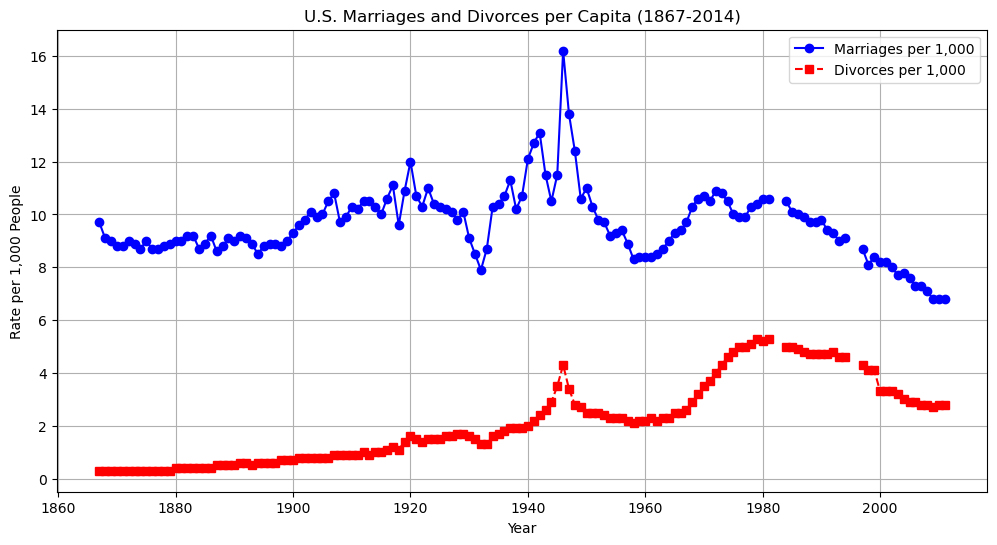

In [11]:
                #Import libraries
import pandas as pd
import matplotlib.pyplot as plt

              #Load and extract dataset
data_path = r"C:\Users\Dell_User\OneDrive - Georgian College\Desktop\us-marriages-divorces-1867-2014.csv"
marriages_divorces = pd.read_csv(data_path)

    
years = marriages_divorces['Year']
marriages = marriages_divorces['Marriages_per_1000']
divorces = marriages_divorces['Divorces_per_1000']

                  
plt.figure(figsize=(12, 6))
plt.plot(years, marriages, label='Marriages per 1,000', marker='o', color='blue', linestyle='-')
plt.plot(years, divorces, label='Divorces per 1,000', marker='s', color='red', linestyle='--')

              #title, and legend
plt.xlabel('Year')
plt.ylabel('Rate per 1,000 People')
plt.title('U.S. Marriages and Divorces per Capita (1867-2014)')
plt.legend()
plt.grid(True)

            #display plot
plt.show()


<h3><font color='#004b87'>Question 7</font></h3>
<p></p>

<li>Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!</li> 
<p></p>




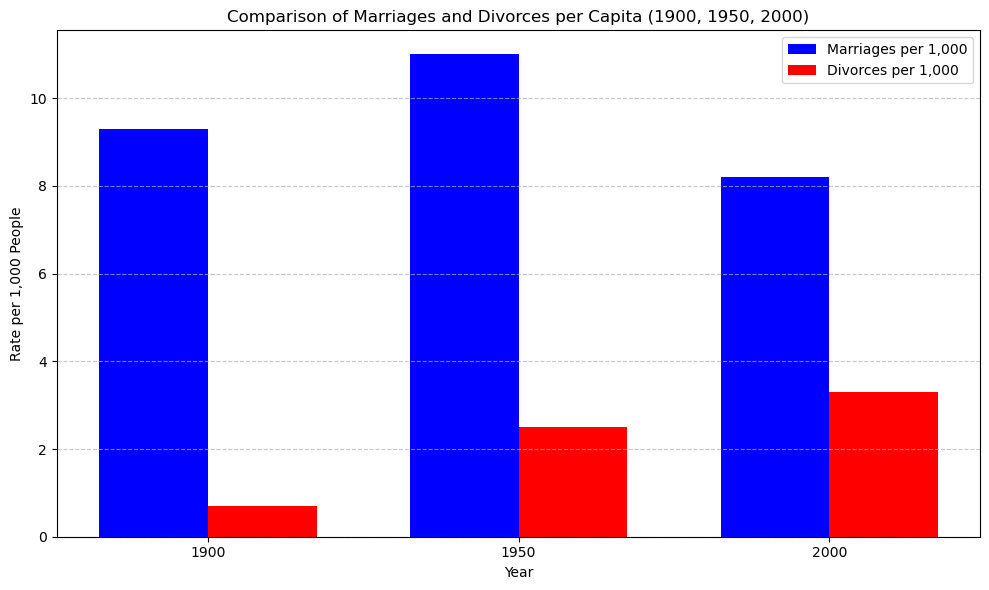

In [12]:

import matplotlib.pyplot as plt

             #Load dataset
data_path = r"C:\Users\Dell_User\OneDrive - Georgian College\Desktop\us-marriages-divorces-1867-2014.csv"
marriages_divorces = pd.read_csv(data_path)

              #Filter data
filtered_data = marriages_divorces[marriages_divorces['Year'].isin([1900, 1950, 2000])]

                #Extract data for plotting
years = filtered_data['Year']
marriages = filtered_data['Marriages_per_1000']
divorces = filtered_data['Divorces_per_1000']

                #bar chart
bar_width = 0.35  # Width of each bar
x = range(len(years))  # X-axis positions

plt.figure(figsize=(10, 6))


plt.bar(x, marriages, width=bar_width, label='Marriages per 1,000', color='blue', align='center')

                    #Divorces bars
plt.bar([pos + bar_width for pos in x], divorces, width=bar_width, label='Divorces per 1,000', color='red', align='center')


plt.xlabel('Year')
plt.ylabel('Rate per 1,000 People')
plt.title('Comparison of Marriages and Divorces per Capita (1900, 1950, 2000)')
plt.xticks([pos + bar_width / 2 for pos in x], years)  # Align tick labels to center of grouped bars
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

            #display plot
plt.tight_layout()
plt.show()


<h3><font color='#004b87'>Question 8</font></h3>
<p></p>

<li>Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!</li> 
<p></p>


In [13]:
print(actor_kills.columns)
actor_kills.columns = actor_kills.columns.str.strip()


NameError: name 'actor_kills' is not defined

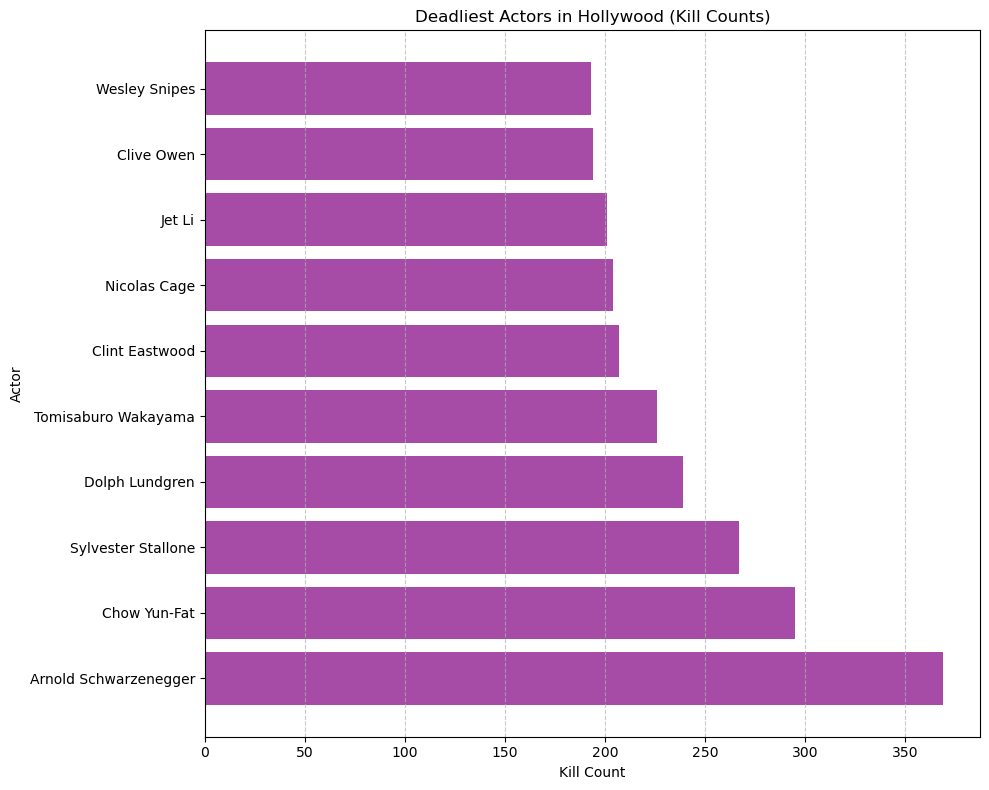

In [14]:
            #Import libraries
import pandas as pd
import matplotlib.pyplot as plt

            #Load dataset
data_path = r"C:\Users\Dell_User\OneDrive - Georgian College\Desktop\actor_kill_counts.csv"
actor_kills = pd.read_csv(data_path)

             #Sort by kill counts in descending order
actor_kills_sorted = actor_kills.sort_values(by='Count', ascending=False)

            #Extract data for plotting
actors = actor_kills_sorted['Actor']
kill_counts = actor_kills_sorted['Count']

             #horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(actors, kill_counts, color='purple', alpha=0.7)

             #title, and grid
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood (Kill Counts)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

          #Display the plot
plt.tight_layout()
plt.show()


<h3><font color='#004b87'>Question 9</font></h3>
<p></p>
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.
<p></p>
   

  

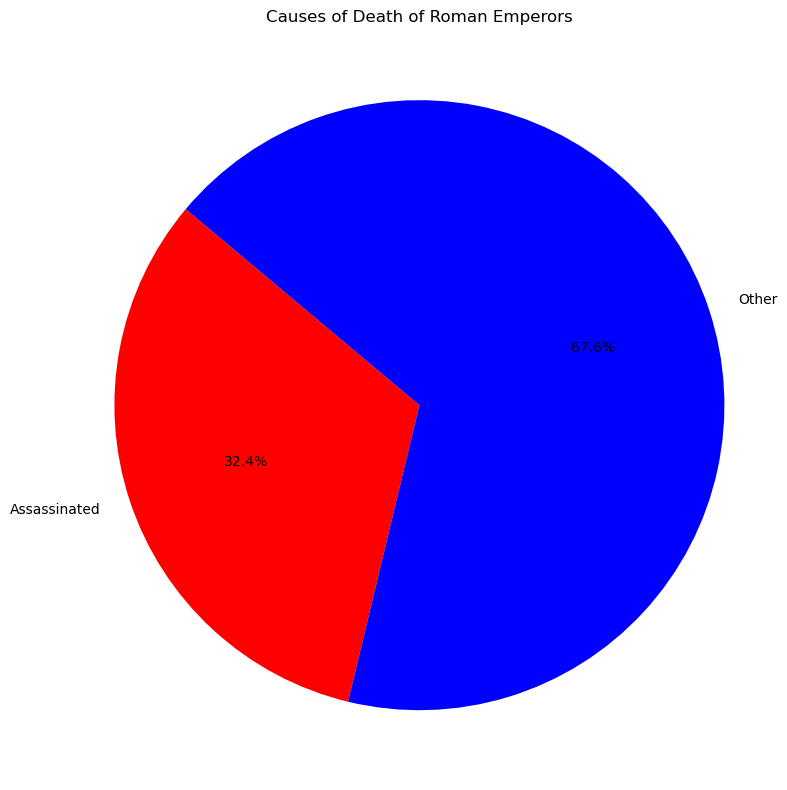

In [15]:
              #Import libraries
import pandas as pd
import matplotlib.pyplot as plt

              #Load dataset
data_path = r"C:\Users\Dell_User\OneDrive - Georgian College\Desktop\roman-emperor-reigns.csv"
emperors = pd.read_csv(data_path)


               #Analyze causes of death
cause_counts = emperors['Cause_of_Death'].value_counts()

              #Extract data
assassinated_count = cause_counts.get('Assassinated', 0)
other_count = cause_counts.sum() - assassinated_count
labels = ['Assassinated', 'Other']
sizes = [assassinated_count, other_count]

                  #pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red', 'blue'])
plt.title('Causes of Death of Roman Emperors')
plt.axis('equal')  # Ensures the pie chart is circular

             #display plot
plt.tight_layout()
plt.show()


<h3><font color='#004b87'>Question 10</font></h3>
<p></p>
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.
<p></p>
   

  

Columns in the dataset: Index(['Year', 'Total Arcade Revenue (billions)',
       'Computer Science Doctorates Awarded (US)'],
      dtype='object')


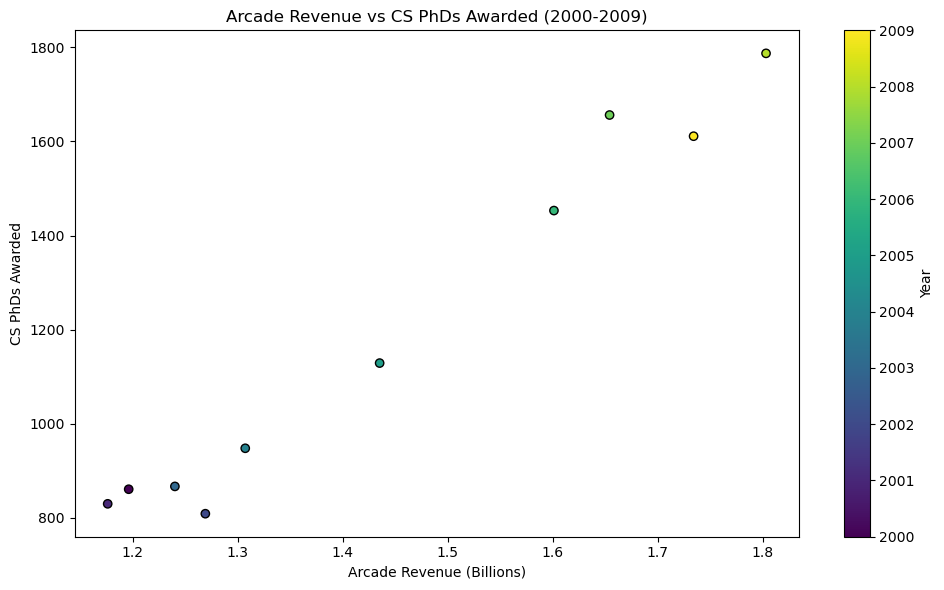

In [16]:
              #Import libraries
import pandas as pd
import matplotlib.pyplot as plt

             #Load dataset
file_path = r"C:\Users\Dell_User\OneDrive - Georgian College\Desktop\arcade-revenue-vs-cs-doctorates.csv"
arcade_cs = pd.read_csv(file_path)

                  #debugging
print("Columns in the dataset:", arcade_cs.columns)

           #Extract data
years = arcade_cs['Year']
arcade_revenue = arcade_cs['Total Arcade Revenue (billions)']  # Corrected column name
cs_phds = arcade_cs['Computer Science Doctorates Awarded (US)']  # Corrected column name

                 #scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(arcade_revenue, cs_phds, c=years, cmap='viridis', edgecolor='k')

              
plt.xlabel('Arcade Revenue (Billions)')
plt.ylabel('CS PhDs Awarded')
plt.title('Arcade Revenue vs CS PhDs Awarded (2000-2009)')
plt.colorbar(scatter, label='Year')  # Add a color bar for years

                #Display the plot
plt.tight_layout()
plt.show()
